In [1]:
#import packages 
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

#import more packages
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
df = pd.read_csv('INTL_LOG_REG_1.csv',encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ï»¿Account Name                          17891 non-null  object 
 1   Account ID 18                            17891 non-null  object 
 2   Opportunity Name                         17891 non-null  object 
 3   Opportunity ID 18                        17891 non-null  object 
 4   Stage (1=Closed Won, 0=Closed Lost)      17891 non-null  int64  
 5   Account FTE/Users                        15294 non-null  float64
 6   FTE <1,000                               17891 non-null  int64  
 7   FTE 1,000-5,000                          17891 non-null  int64  
 8   FTE 5,000-10,000                         17891 non-null  int64  
 9   FTE >10,000                              17891 non-null  int64  
 10  Fiscal Quarter                           17891

In [4]:
#drop complicating variables
df= df.drop(['Number of Emails Before Response'], axis=1)
df= df.drop(['Gap between Close Date and Go Live Date'], axis=1)
df= df.drop(['Lead Source'], axis=1)
df= df.drop(['ï»¿Account Name'], axis=1)
df= df.drop(['Opportunity Name'], axis=1)
df= df.drop(['Account ID 18'], axis=1)
df= df.drop(['Opportunity ID 18'], axis=1)
df= df.drop(['Contact: Title'], axis=1)
df= df.drop(['Implementation Package'], axis=1)
df= df.drop(['Primary LMS'], axis=1)
df= df.drop(['Primary SIS'], axis=1)
df= df.drop(['Org Type'], axis=1)
df= df.drop(['Customer Success Region'], axis=1)
df= df.drop(['Email Opt Out'], axis=1)
df= df.drop(['Type'], axis=1)

In [5]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Account FTE/Users'].fillna(df['Account FTE/Users'].mean(), inplace=True)
df['Department Source'].fillna(df['Department Source'].mode()[0], inplace=True)
df['Product Type'].fillna(df['Product Type'].mode()[0], inplace=True)
df['Inbound/Outbound Source'].fillna(df['Inbound/Outbound Source'].mode()[0], inplace=True)
df['Days Since Last Activity'].fillna(df['Days Since Last Activity'].mean(), inplace=True)
df['FFT Teachers Active'].fillna(df['FFT Teachers Active'].median(), inplace=True)
df['FFT Students Active'].fillna(df['FFT Students Active'].median(), inplace=True)
df['FFT Observers Active'].fillna(df['FFT Observers Active'].median(), inplace=True)
df['FFT Courses Active'].fillna(df['FFT Courses Active'].median(), inplace=True)

<AxesSubplot:>

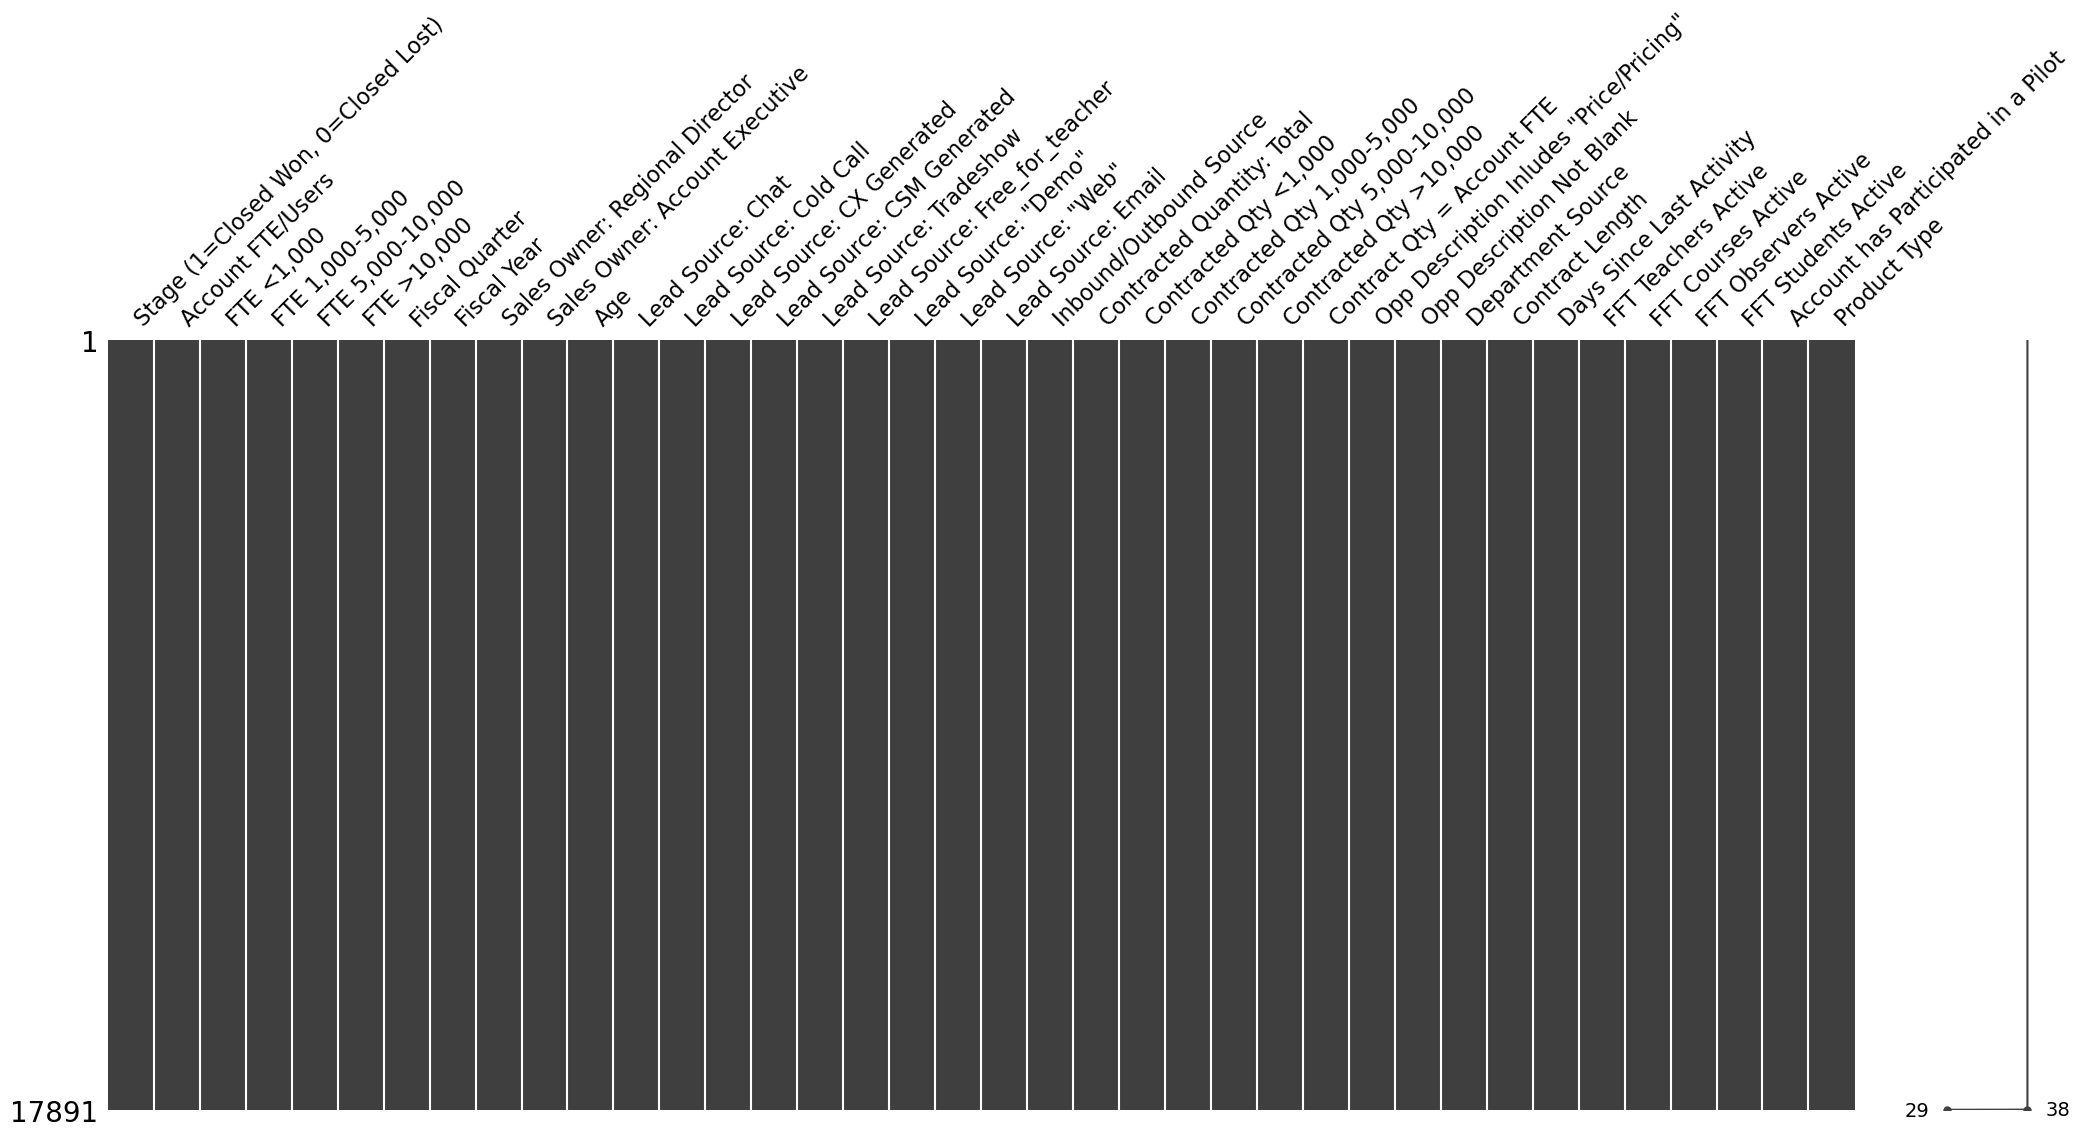

In [6]:
import missingno as msno
msno.matrix(df)

In [7]:
df.dtypes

Stage (1=Closed Won, 0=Closed Lost)          int64
Account FTE/Users                          float64
FTE <1,000                                   int64
FTE 1,000-5,000                              int64
FTE 5,000-10,000                             int64
FTE >10,000                                  int64
Fiscal Quarter                              object
Fiscal Year                                  int64
Sales Owner: Regional Director               int64
Sales Owner: Account Executive               int64
Age                                          int64
Lead Source: Chat                          float64
Lead Source: Cold Call                     float64
Lead Source: CX Generated                  float64
Lead Source: CSM Generated                 float64
Lead Source: Tradeshow                     float64
Lead Source: Free_for_teacher              float64
Lead Source: "Demo"                        float64
Lead Source: "Web"                         float64
Lead Source: Email             

In [8]:
# create dummy variables 
dummies= pd.get_dummies(df[["Fiscal Quarter","Inbound/Outbound Source","Department Source","Product Type"]])
df = pd.concat([df, dummies], axis=1)

In [9]:
#drop original dummy variables
df = df.drop(['Fiscal Quarter'], axis=1)
df = df.drop(['Inbound/Outbound Source'], axis=1)
df = df.drop(['Department Source'], axis=1)
df = df.drop(['Product Type'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17891 non-null  int64  
 1   Account FTE/Users                        17891 non-null  float64
 2   FTE <1,000                               17891 non-null  int64  
 3   FTE 1,000-5,000                          17891 non-null  int64  
 4   FTE 5,000-10,000                         17891 non-null  int64  
 5   FTE >10,000                              17891 non-null  int64  
 6   Fiscal Year                              17891 non-null  int64  
 7   Sales Owner: Regional Director           17891 non-null  int64  
 8   Sales Owner: Account Executive           17891 non-null  int64  
 9   Age                                      17891 non-null  int64  
 10  Lead Source: Chat                        17884

In [11]:
#drop k-1 dummy variables
df = df.drop(['Department Source_Partner Generated'], axis=1)
df = df.drop(['Product Type_Subscription Add-ons'], axis=1)
df = df.drop(['Opp Description Not Blank'], axis=1)
df = df.drop(['Fiscal Quarter_Q1'], axis=1)
df = df.drop(['Fiscal Year'], axis=1)

In [12]:
# transform variables
df['Fiscal Quarter_Q2'] = df['Fiscal Quarter_Q2'].astype(float)
df['Fiscal Quarter_Q3'] = df['Fiscal Quarter_Q3'].astype(float)
df['Fiscal Quarter_Q4'] = df['Fiscal Quarter_Q4'].astype(float)
df['Inbound/Outbound Source_Outbound'] = df['Inbound/Outbound Source_Outbound'].astype(float)
df['Department Source_CS Generated'] = df['Department Source_CS Generated'].astype(float)
df['Department Source_CX Generated'] = df['Department Source_CX Generated'].astype(float)
df['Department Source_Channel Generated'] = df['Department Source_Channel Generated'].astype(float)
df['Department Source_Marketing Generated'] = df['Department Source_Marketing Generated'].astype(float)
df['Department Source_Sales Generated'] = df['Department Source_Sales Generated'].astype(float)
df['Product Type_Cloud SaaS Subscription'] = df['Product Type_Cloud SaaS Subscription'].astype(float)
df['Product Type_Custom Development'] = df['Product Type_Custom Development'].astype(float)
df['Product Type_Implementation'] = df['Product Type_Implementation'].astype(float)
df['Product Type_Pilot'] = df['Product Type_Pilot'].astype(float)
df['Product Type_Support'] = df['Product Type_Support'].astype(float)
df['Product Type_Training'] = df['Product Type_Training'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 55 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17891 non-null  int64  
 1   Account FTE/Users                        17891 non-null  float64
 2   FTE <1,000                               17891 non-null  int64  
 3   FTE 1,000-5,000                          17891 non-null  int64  
 4   FTE 5,000-10,000                         17891 non-null  int64  
 5   FTE >10,000                              17891 non-null  int64  
 6   Sales Owner: Regional Director           17891 non-null  int64  
 7   Sales Owner: Account Executive           17891 non-null  int64  
 8   Age                                      17891 non-null  int64  
 9   Lead Source: Chat                        17884 non-null  float64
 10  Lead Source: Cold Call                   17884

In [14]:
df = df.drop(['Contract Length'], axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17891 non-null  int64  
 1   Account FTE/Users                        17891 non-null  float64
 2   FTE <1,000                               17891 non-null  int64  
 3   FTE 1,000-5,000                          17891 non-null  int64  
 4   FTE 5,000-10,000                         17891 non-null  int64  
 5   FTE >10,000                              17891 non-null  int64  
 6   Sales Owner: Regional Director           17891 non-null  int64  
 7   Sales Owner: Account Executive           17891 non-null  int64  
 8   Age                                      17891 non-null  int64  
 9   Lead Source: Chat                        17884 non-null  float64
 10  Lead Source: Cold Call                   17884

In [22]:
#perform imputation for nulls (If there is symmetry in the dataset, use the mean. If the dataset is skewed use the median. Use the mode with qualitative variables.)
df['Lead Source: Chat'].fillna(df['Lead Source: Chat'].mode()[0], inplace=True)
df['Lead Source: Cold Call'].fillna(df['Lead Source: Cold Call'].mode()[0], inplace=True)
df['Lead Source: CX Generated'].fillna(df['Lead Source: CX Generated'].mode()[0], inplace=True)
df['Lead Source: CSM Generated'].fillna(df['Lead Source: CSM Generated'].mode()[0], inplace=True)
df['Lead Source: Tradeshow'].fillna(df['Lead Source: Tradeshow'].mode()[0], inplace=True)
df['Lead Source: Free_for_teacher'].fillna(df['Lead Source: Free_for_teacher'].mode()[0], inplace=True)
df['Lead Source: "Demo"'].fillna(df['Lead Source: "Demo"'].mode()[0], inplace=True)
df['Lead Source: "Web"'].fillna(df['Lead Source: "Web"'].mode()[0], inplace=True)
df['Lead Source: Email'].fillna(df['Lead Source: Email'].mode()[0], inplace=True)

In [15]:
# Calculate the required sample size
N = 10 k / p
1,245=(10*64) / .5137

SyntaxError: invalid syntax (3532883913.py, line 2)

In [16]:
#import packages for log regression
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17891 entries, 0 to 17890
Data columns (total 54 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Stage (1=Closed Won, 0=Closed Lost)      17891 non-null  int64  
 1   Account FTE/Users                        17891 non-null  float64
 2   FTE <1,000                               17891 non-null  int64  
 3   FTE 1,000-5,000                          17891 non-null  int64  
 4   FTE 5,000-10,000                         17891 non-null  int64  
 5   FTE >10,000                              17891 non-null  int64  
 6   Sales Owner: Regional Director           17891 non-null  int64  
 7   Sales Owner: Account Executive           17891 non-null  int64  
 8   Age                                      17891 non-null  int64  
 9   Lead Source: Chat                        17891 non-null  float64
 10  Lead Source: Cold Call                   17891

In [24]:
#perform logistic regression
x= df.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df['Stage (1=Closed Won, 0=Closed Lost)']

In [25]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared:                       0.190
Model:                                             OLS   Adj. R-squared:                  0.187
Method:                                  Least Squares   F-statistic:                     85.15
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                                         08:28:41   Log-Likelihood:                -11098.
No. Observations:                                17891   AIC:                         2.230e+04
Df Residuals:                                    17841   BIC:                         2.269e+04
Df Model:                                           49                                         
Covariance Type:                             nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Account FTE/Users                       -1.047e-07   3.29e-08     -3.184      0.001   -1.69e-07   -4.02e-08
FTE <1,000                                 -0.0155      0.012     -1.308      0.191      -0.039       0.008
FTE 1,000-5,000                            -0.0690      0.013     -5.350      0.000      -0.094      -0.044
FTE 5,000-10,000                           -0.0974      0.017     -5.827      0.000      -0.130      -0.065
FTE >10,000                                -0.1053      0.014     -7.587      0.000      -0.133      -0.078
Sales Owner: Regional Director             -0.1078      0.010    -11.210      0.000      -0.127      -0.089
Sales Owner: Account Executive             -0.1774      0.012    -14.365      0.000      -0.202      -0.153
Age                                     -6.976e-05    1.6e-05     -4.357      0.000      -0.000   -3.84e-05
Lead Source: Chat                          -0.1151      0.040     -2.847      0.004      -0.194      -0.036
Lead Source: Cold Call                   6.954e-12    9.5e-12      0.732      0.464   -1.17e-11    2.56e-11
Lead Source: CX Generated                   0.2188      0.053      4.140      0.000       0.115       0.322
Lead Source: CSM Generated                 -0.0226      0.021     -1.072      0.284      -0.064       0.019
Lead Source: Tradeshow                     -0.0770      0.014     -5.689      0.000      -0.104      -0.050
Lead Source: Free_for_teacher              -0.2828      0.013    -21.735      0.000      -0.308      -0.257
Lead Source: "Demo"                        -0.1603      0.018     -9.158      0.000      -0.195      -0.126
Lead Source: "Web"                         -0.1232      0.010    -12.956      0.000      -0.142      -0.105
Lead Source: Email                         -0.0700      0.023     -3.110      0.002      -0.114      -0.026
Contracted Quantity: Total              -8.645e-08   6.61e-08     -1.308      0.191   -2.16e-07    4.31e-08
Contracted Qty <1,000                       0.3210      0.015     22.120      0.000       0.293       0.349
Contracted Qty 1,000-5,000                  0.2899      0.016     18.144      0.000       0.259       0.321
Contracted Qty 5,000-10,000                 0.2918      0.020     14.881      0.000       0.253       0.330
Contracted Qty >10,000                      0.2680      0.019     14.359      0.000       0.231       0.305
Contract Qty = Account FTE                 -0.0688      0.009     -7.710      0.000      -0.086      -0.051
Opp Description Inludes "Price/Pricing"    -0.0675      0.011     -5.956      0.000     

In [29]:
#create new data frame with statistically significant pvalues
df = df[['Account FTE/Users', 
        'FTE 1,000-5,000',
        'FTE >10,000',
        'Sales Owner: Regional Director',
        'Sales Owner: Account Executive',
        'Age',
        'Lead Source: Chat',
        'Lead Source: CX Generated',
        'Lead Source: Tradeshow',
        'Lead Source: Free_for_teacher',
        'Lead Source: "Demo"',
        'Lead Source: Email',
        'Lead Source: "Web"',
        'Contracted Qty 1,000-5,000',
        'Contracted Qty 5,000-10,000',
        'Contracted Qty >10,000',
        'Contract Qty = Account FTE',
        'Opp Description Inludes "Price/Pricing"',
        'FFT Teachers Active',
        'FFT Courses Active',
        'Account has Participated in a Pilot',
        'Fiscal Quarter_Q2', 
        'Fiscal Quarter_Q4',
        'Inbound/Outbound Source_Inbound',   
        'Inbound/Outbound Source_Outbound',  
        'Department Source_Channel Generated', 
        'Department Source_Marketing Generated', 
        'Product Type_Cloud SaaS Subscription',
        'Product Type_Custom Development',
        'Product Type_Implementation',
        'Product Type_Instructional Design',
        'Product Type_Partnership',
        'Product Type_Support',
        'Product Type_Training',
        'Stage (1=Closed Won, 0=Closed Lost)']]


In [30]:
# find VIF  
df_before = df

X1 = sm.tools.add_constant(df_before)

series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

print('DATA BEFORE')
print('-'*100)
display(series_before)

DATA BEFORE
----------------------------------------------------------------------------------------------------


const                                         0.000000
Account FTE/Users                             1.070567
FTE 1,000-5,000                               1.349678
FTE >10,000                                   1.627720
Sales Owner: Regional Director                1.167921
Sales Owner: Account Executive                1.330820
Age                                           1.125755
Lead Source: Chat                             1.015409
Lead Source: CX Generated                     1.035929
Lead Source: Tradeshow                        1.079677
Lead Source: Free_for_teacher                 1.166172
Lead Source: "Demo"                           1.076403
Lead Source: Email                            1.033102
Lead Source: "Web"                            1.198863
Contracted Qty 1,000-5,000                    1.290013
Contracted Qty 5,000-10,000                   1.057561
Contracted Qty >10,000                        1.311608
Contract Qty = Account FTE                    1.173836
Opp Descri

In [31]:
#drop Outbound
df_after = df.drop(['Inbound/Outbound Source_Outbound'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                        38.051805
Account FTE/Users                             1.070567
FTE 1,000-5,000                               1.349678
FTE >10,000                                   1.627720
Sales Owner: Regional Director                1.167921
Sales Owner: Account Executive                1.330820
Age                                           1.125755
Lead Source: Chat                             1.015409
Lead Source: CX Generated                     1.035929
Lead Source: Tradeshow                        1.079677
Lead Source: Free_for_teacher                 1.166172
Lead Source: "Demo"                           1.076403
Lead Source: Email                            1.033102
Lead Source: "Web"                            1.198863
Contracted Qty 1,000-5,000                    1.290013
Contracted Qty 5,000-10,000                   1.057561
Contracted Qty >10,000                        1.311608
Contract Qty = Account FTE                    1.173836
Opp Descri

In [32]:
#drop Department Source_Sales Generated
df_after = df_after.drop(['FFT Courses Active'], axis=1)

X2 = sm.tools.add_constant(df_after)

series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

print('DATA AFTER')
print('-'*100)
display(series_after)


DATA AFTER
----------------------------------------------------------------------------------------------------


const                                      38.050340
Account FTE/Users                           1.070561
FTE 1,000-5,000                             1.349669
FTE >10,000                                 1.627519
Sales Owner: Regional Director              1.167886
Sales Owner: Account Executive              1.330770
Age                                         1.125732
Lead Source: Chat                           1.015408
Lead Source: CX Generated                   1.035928
Lead Source: Tradeshow                      1.079668
Lead Source: Free_for_teacher               1.166160
Lead Source: "Demo"                         1.076323
Lead Source: Email                          1.033101
Lead Source: "Web"                          1.198211
Contracted Qty 1,000-5,000                  1.289993
Contracted Qty 5,000-10,000                 1.057548
Contracted Qty >10,000                      1.311523
Contract Qty = Account FTE                  1.173836
Opp Description Inludes "Price/Pricing"     1.

In [33]:
#perform logistic regression
x= df_after.drop('Stage (1=Closed Won, 0=Closed Lost)', axis =1)
y= df_after['Stage (1=Closed Won, 0=Closed Lost)']

In [34]:
model = LogisticRegression(solver= 'liblinear' , random_state=0)

model.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn' , n_jobs=None, penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# create a OLS model
model = sm.OLS(y, x)

# fit the data
est = model.fit()

# show summary
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Stage (1=Closed Won, 0=Closed Lost)   R-squared (uncentered):                   0.562
Model:                                             OLS   Adj. R-squared (uncentered):              0.561
Method:                                  Least Squares   F-statistic:                              715.6
Date:                                 Mon, 19 Dec 2022   Prob (F-statistic):                        0.00
Time:                                         08:42:15   Log-Likelihood:                         -12047.
No. Observations:                                17891   AIC:                                  2.416e+04
Df Residuals:                                    17859   BIC:                                  2.441e+04
Df Model:                                           32                                                  
Covariance Type:                             nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Account FTE/Users                       -8.592e-08   3.36e-08     -2.560      0.010   -1.52e-07   -2.01e-08
FTE 1,000-5,000                             0.0231      0.009      2.466      0.014       0.005       0.041
FTE >10,000                                 0.0383      0.011      3.635      0.000       0.018       0.059
Sales Owner: Regional Director             -0.0503      0.010     -5.123      0.000      -0.070      -0.031
Sales Owner: Account Executive             -0.0984      0.012     -7.978      0.000      -0.123      -0.074
Age                                     -1.613e-05   1.65e-05     -0.976      0.329   -4.85e-05    1.63e-05
Lead Source: Chat                          -0.1205      0.043     -2.829      0.005      -0.204      -0.037
Lead Source: CX Generated                   0.3245      0.045      7.207      0.000       0.236       0.413
Lead Source: Tradeshow                     -0.0605      0.014     -4.270      0.000      -0.088      -0.033
Lead Source: Free_for_teacher              -0.2727      0.014    -20.077      0.000      -0.299      -0.246
Lead Source: "Demo"                        -0.1574      0.018     -8.698      0.000      -0.193      -0.122
Lead Source: Email                         -0.0376      0.024     -1.590      0.112      -0.084       0.009
Lead Source: "Web"                         -0.1041      0.010    -10.480      0.000      -0.124      -0.085
Contracted Qty 1,000-5,000                 -0.0543      0.010     -5.602      0.000      -0.073      -0.035
Contracted Qty 5,000-10,000                -0.0665      0.016     -4.045      0.000      -0.099      -0.034
Contracted Qty >10,000                     -0.1091      0.016     -7.024      0.000      -0.139      -0.079
Contract Qty = Account FTE                 -0.0246      0.009     -2.713      0.007      -0.042      -0.007
Opp Description Inludes "Price/Pricing"    -0.0778      0.012     -6.707      0.000      -0.100      -0.055
FFT Teachers Active                        -0.0017      0.007     -0.254      0.800      -0.015       0.011
Account has Participated in a Pilot         0.1299      0.014      9.574      0.000       0.103       0.156
Fiscal Quarter_Q2                           0.0759      0.009      8.754      0.000       0.059       0.093
Fiscal Quarter_Q4                           0.0947      0.009     11.097      0.000       0.078       0.111
Inbound/Outbound Source_Inbound             0.1777      0.011     15.519      0.000       0.155  